In [1]:
from __future__ import print_function

import argparse

import numpy as np
import torch
import torch.utils.data

import make_hierarchical_signals
from model import RecurrentNetContinual

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
use_cuda = False
torch.manual_seed(1)
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

model = RecurrentNetContinual(n_in=200, n_hid=200, n_out=1,
                                  t_constant=0.3, use_cuda=use_cuda).to(device)
model.load_state_dict(torch.load('./work/04012148_recurrent_memory_fix_inmatrix_pos_neg_epoch_100.pth', map_location='cpu'))

cpu


In [35]:
signals = []
targets = []
for i in range(1):
    signal, target = make_hierarchical_signals.hierarchical_signals(n_episodes=20,
                                                                        stim_dur=10,
                                                                        sig1_stim_dur=10,
                                                                        resp_dur=5,
                                                                        each_episodes=20,
                                                                        spon_rate=0.01)
    signals.append(signal)
    targets.append(target)

signals = np.array(signals)
targets = np.array(targets)

signals = torch.from_numpy(signals)
targets = torch.from_numpy(targets)

hidden = torch.zeros(1, 200, requires_grad=False)
hidden = hidden.to(device)

signals = signals.float()
targets = targets.float()

signals, targets = signals.to(device), targets.to(device)

hidden_list, output, hidden = model(signals, hidden)


In [36]:
print(hidden_list.shape)

torch.Size([1, 900, 200])


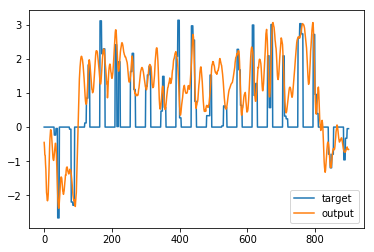

In [37]:
plt.plot(targets[0].data.numpy().T[0], label='target')
plt.plot(output[0].data.numpy().T[0], label='output')
plt.legend()

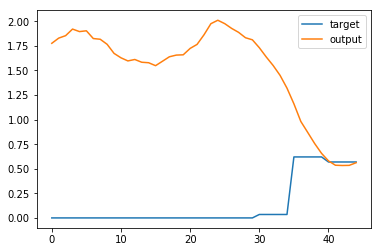

In [42]:
plt.plot(targets[0].data.numpy().T[0][495:540], label='target')
plt.plot(output[0].data.numpy().T[0][495:540], label='output')
plt.legend()

In [38]:
print(hidden_list.data.numpy()[0].T)

[[1.4935899e-01 3.8331190e-01 5.6464791e-01 ... 2.8416175e-01
  2.5330466e-01 2.4037811e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.1325366e-03
  1.4927756e-03 1.0449429e-03]
 [5.7582599e-01 8.3597362e-01 1.1800356e+00 ... 7.0520028e-13
  4.9364018e-13 3.4554811e-13]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.1492233e-14
  1.5044562e-14 1.0531194e-14]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.6030222e-01
  2.9762468e-01 3.3413643e-01]
 [1.4324516e-01 3.0728912e-01 2.1510239e-01 ... 2.5727072e-01
  1.8008950e-01 1.2606265e-01]]


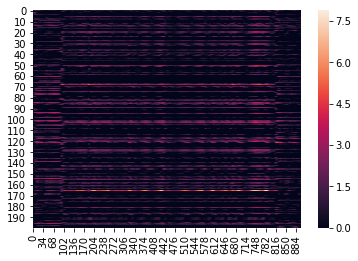

In [39]:
import seaborn as sns
sns.heatmap(hidden_list.data.numpy()[0].T)

Text(33,0.5,'neuron index')

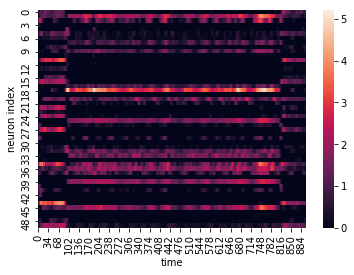

In [40]:
sns.heatmap(hidden_list.data.numpy()[0].T[50:100])
plt.xlabel('time')
plt.ylabel('neuron index')
# plt.savefig('internal_dynamics.png')

Text(0,0.5,'activation')

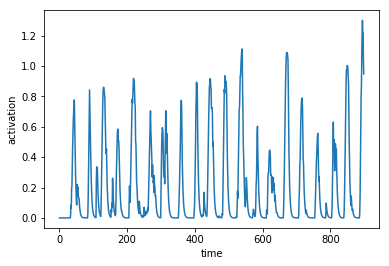

In [10]:
plt.plot(hidden_list.data.numpy()[0].T[7])
plt.xlabel('time')
plt.ylabel('activation')
# plt.savefig('activation2.png')

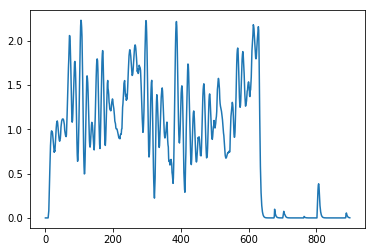

In [11]:
plt.plot(hidden_list.data.numpy()[0].T[9])

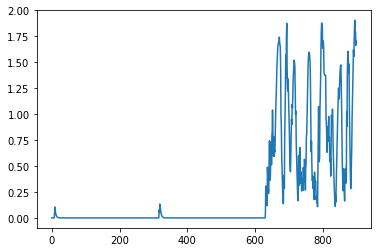

In [12]:
plt.plot(hidden_list.data.numpy()[0].T[12])

Text(0,0.5,'activation')

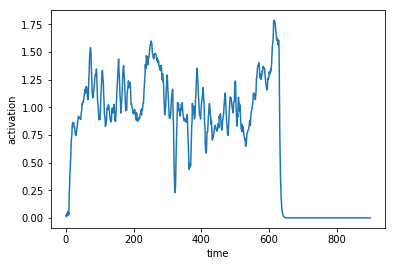

In [13]:
plt.plot(hidden_list.data.numpy()[0].T[16])
plt.xlabel('time')
plt.ylabel('activation')
# plt.savefig('activation1.png')

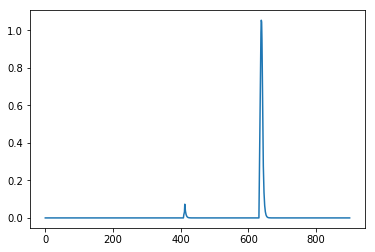

In [14]:
plt.plot(hidden_list.data.numpy()[0].T[27])

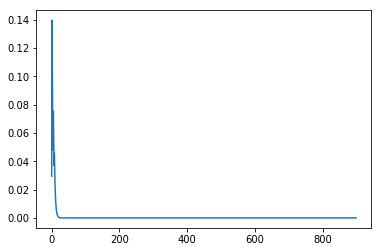

In [15]:
plt.plot(hidden_list.data.numpy()[0].T[30])

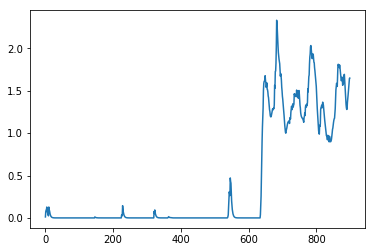

In [16]:
plt.plot(hidden_list.data.numpy()[0].T[31])

Text(33,0.5,'neuron index')

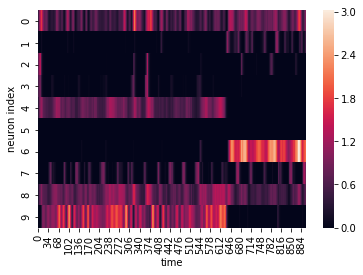

In [17]:
sns.heatmap(hidden_list.data.numpy()[0].T[0:10])
plt.xlabel('time')
plt.ylabel('neuron index')

In [18]:
print(hidden_list.data.numpy()[0].T[0:10, :45].shape)

(10, 45)


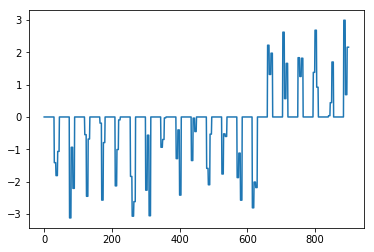

In [19]:
plt.plot(targets[0].data.numpy().T[0], label='target')

Text(33,0.5,'neuron index')

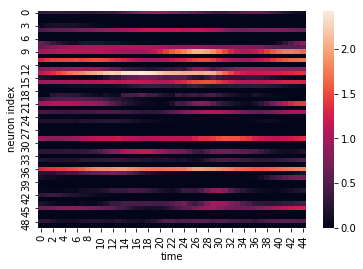

In [22]:
sns.heatmap(hidden_list.data.numpy()[0].T[0:50, 45:90])
plt.xlabel('time')
plt.ylabel('neuron index')

Text(33,0.5,'neuron index')

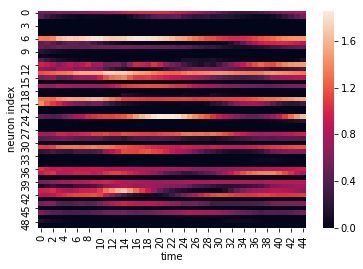

In [24]:
sns.heatmap(hidden_list.data.numpy()[0].T[0:50, 810:855])
plt.xlabel('time')
plt.ylabel('neuron index')

Text(33,0.5,'neuron index')

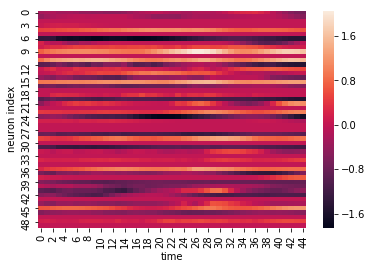

In [25]:
sns.heatmap(hidden_list.data.numpy()[0].T[0:50, 45:90]- hidden_list.data.numpy()[0].T[0:50, 810:855])
plt.xlabel('time')
plt.ylabel('neuron index')

Text(33,0.5,'neuron index')

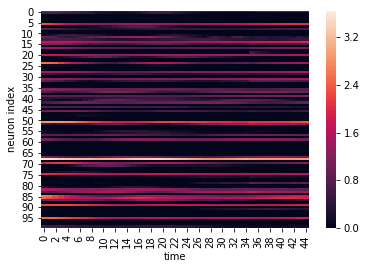

In [26]:
sns.heatmap(hidden_list.data.numpy()[0].T[0:100, 700:745])
plt.xlabel('time')
plt.ylabel('neuron index')

Text(33,0.5,'neuron index')

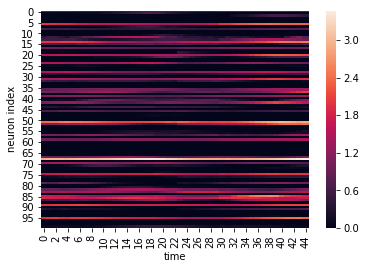

In [27]:
sns.heatmap(hidden_list.data.numpy()[0].T[0:100, 745:790])
plt.xlabel('time')
plt.ylabel('neuron index')

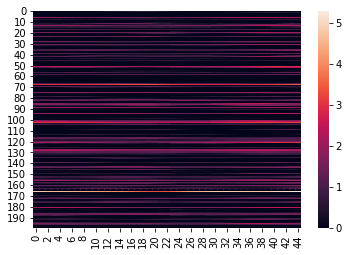

In [28]:
sns.heatmap(hidden_list.data.numpy()[0].T[0:300, 745:790])

Text(0,0.5,'activation')

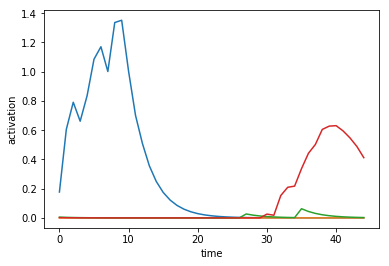

In [29]:
plt.plot(hidden_list.data.numpy()[0].T[2][:45])
plt.plot(hidden_list.data.numpy()[0].T[2][45:90])
plt.plot(hidden_list.data.numpy()[0].T[2][700:745])
plt.plot(hidden_list.data.numpy()[0].T[2][745:790])
plt.xlabel('time')
plt.ylabel('activation')
# plt.savefig('activation2.png')

Text(0,0.5,'activation')

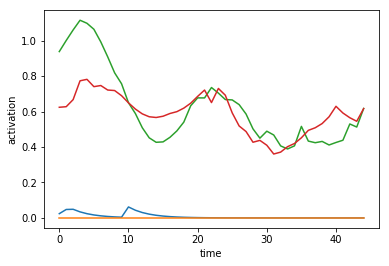

In [30]:
neuron_idx= 46
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][:45])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][45:90])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][700:745])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][745:790])
plt.xlabel('time')
plt.ylabel('activation')
# plt.savefig('activation2.png')

Text(0,0.5,'activation')

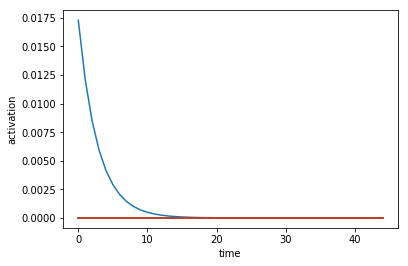

In [31]:
neuron_idx= 47
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][:45])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][45:90])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][700:745])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][745:790])
plt.xlabel('time')
plt.ylabel('activation')

Text(0,0.5,'activation')

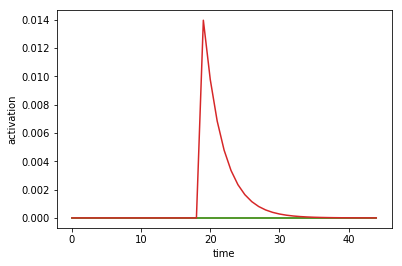

In [32]:
neuron_idx= 54
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][:45])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][45:90])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][700:745])
plt.plot(hidden_list.data.numpy()[0].T[neuron_idx][745:790])
plt.xlabel('time')
plt.ylabel('activation')

Text(0,0.5,'activation')

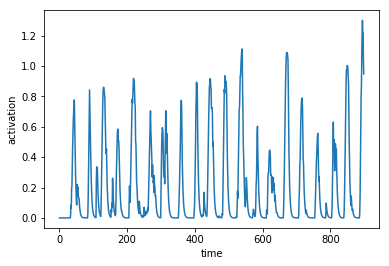

In [33]:
plt.plot(hidden_list.data.numpy()[0].T[7])
plt.xlabel('time')
plt.ylabel('activation')
# plt.savefig('activation2.png')

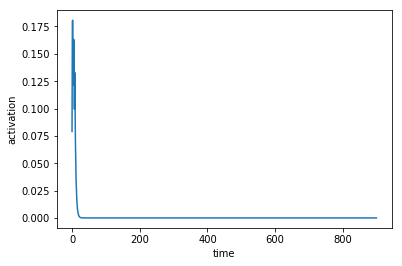

In [34]:
plt.plot(hidden_list.data.numpy()[0].T[53])
plt.xlabel('time')
plt.ylabel('activation')
plt.savefig('activation2.png')